In [1]:
# Importando as bibliotecas
import pandas as pd
from sklearn import tree;
from sklearn.model_selection import train_test_split

In [173]:
# covidData = pd.read_excel("../database/dados-preprocessados-novos-organizados.xlsx")
# covidData = pd.read_excel("../database/dados-modelo1-dados-trocados.xlsx")
covidData = pd.read_excel("../database/DP_SupVent_Jan21.xlsx")
covidData.drop(columns=["SUPORT_VEN"], inplace=True)
covidData.head()
#covidData.shape

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,...,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,UTI
0,0,4,4,2,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
1,1,5,4,2,1,1,1,1,1,1,...,2,2,2,1,2,2,2,2,2,2
2,1,4,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,2
3,1,4,4,2,1,1,2,1,1,1,...,2,2,2,1,2,2,2,2,2,1
4,1,5,4,2,1,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,2


In [175]:
# Trocando os valores de evolução 1  -> 0 (curado); 2 -> 1 (óbito)
#evolucao_valores = {1:0, 2:1}
#covidData['EVOLUCAO'] = covidData['EVOLUCAO'].map(evolucao_valores)

# Trocando os valores 9 de suporte ventilatório
suporte_valores = {1:1, 2:2, 9:2}
covidData["UTI"] = covidData["UTI"].map(suporte_valores)
covidData["UTI"].value_counts()


1    412
2    362
Name: UTI, dtype: int64

In [224]:
#Filtrando os atributos 
# ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_SEMANAS", "DISPNEIA", "DESC_RESP", 
#                "FATOR_RISC", "SURTO_SG", "CARDIOPATI", "DIABETES", "PNEUMOPATI",
#                "SATURACAO", "DIARREIA", "VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]

#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_SEMANAS", "DISPNEIA", 
#                "FATOR_RISC", "SURTO_SG", "CARDIOPATI", "DIABETES", "PNEUMOPATI",
#                "SATURACAO", "DIARREIA", "VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]

#Todos os atributos selecionados - 26 ("UTI", "EVOLUCAO", "QNT_DIAS")
#attributes = ["CS_SEXO", "NU_IDADE_N", "CS_RACA", "SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", 
#              "SATURACAO", "DIARREIA", "VOMITO", "FATOR_RISC", "PUERPERA", "CARDIOPATI", "HEMATOLOGI", "SIND_DOWN", 
#              "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC", "PNEUMOPATI", "IMUNODEPRE", "RENAL", "OBESIDADE", "SUPORT_VEN"]

attributes = ["CS_SEXO", "NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", 
              "SATURACAO", "DIARREIA", "VOMITO", "FATOR_RISC", "CARDIOPATI", "DIABETES", "OBESIDADE", "UTI"]

covidData = covidData[attributes]
covidData.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,FATOR_RISC,CARDIOPATI,DIABETES,OBESIDADE,UTI
0,0,4,4,1,1,1,1,1,1,2,2,1,1,2,2,1
1,1,5,4,1,1,1,1,1,1,2,2,1,2,1,2,2
2,1,4,4,1,1,2,1,1,1,1,2,2,2,2,2,2
3,1,4,4,1,1,2,1,1,1,2,2,1,2,1,2,1
4,1,5,4,1,1,2,1,1,1,2,2,2,2,2,2,2


In [5]:
#attributes = ["NU_IDADE_N", "CS_RACA", "FEBRE", "TOSSE", "GARGANTA", "QNT_DIAS", "DISPNEIA", "DESC_RESP", "FATOR_RISC", 
#               "SATURACAO", "DIARREIA","VOMITO", "OBESIDADE", "UTI", "SUPORT_VEN", "EVOLUCAO"]
#covidData.drop(columns=['FATOR_RISC'], inplace = True)
#covidData.head()

# Aplicando o PCA

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = covidData.drop(columns=['EVOLUCAO'], inplace = False)

x = StandardScaler().fit_transform(x)


In [112]:
pca = PCA (n_components = 20)

principalComponents = pca.fit_transform(x)

# ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14',
# 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25']

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                          'PC11', 'PC12', 'PC13'])
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.828928,-0.869096,1.122837,-0.455836,-0.085615,0.959222,-0.009339,0.524570,0.138848,0.566827,-0.459496,0.403662,0.011834
1,-1.630747,0.376140,-0.442482,0.894236,0.349870,0.167390,-0.592239,-0.426566,0.375516,0.144432,-0.065381,0.215443,0.070714
2,-1.663902,1.303686,-0.981353,-0.988004,-0.066478,0.362695,-0.184976,-0.593723,0.100909,0.140629,0.713633,-0.277646,0.059385
3,-1.708409,-0.601199,0.258571,-0.361334,0.008403,0.429916,-0.329834,-0.427448,-0.213322,0.025614,-0.773854,0.109037,-0.076466
4,-1.422633,1.186133,-0.954997,-0.385775,-0.161961,0.465056,-0.351087,-0.166432,0.262601,-0.249773,1.157436,-0.262514,0.173847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,-1.390143,2.053920,-1.173188,-0.977781,0.334528,0.073427,-0.023617,-0.252843,-0.260114,-0.241018,0.049972,-0.333369,0.159938
770,-1.460198,-1.259102,-0.000462,1.092274,-1.020590,-0.202774,1.036892,-0.125093,0.053397,-0.413512,0.261152,0.104969,-0.049869
771,1.053471,-1.595506,0.290521,-0.781088,-0.297356,-0.196277,-1.410218,0.860387,0.930334,-0.145703,-0.496721,0.275977,-0.110795
772,2.749284,-0.811410,-2.201801,-0.149383,2.297809,0.229094,0.376966,0.430719,-0.569498,0.677442,-0.529407,0.993754,0.058057


# Transformando os dados - Dummies

In [93]:
#Usando o getDummies
covidTrain = pd.get_dummies(covidData, prefix=["NU_IDADE_N", "CS_RACA", "SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", 
                                               "DISPNEIA", "CS_SEXO	", "DESC_RESP", "SATURACAO", "DIARREIA","VOMITO", "CARDIOPATI", 
                                               "DIABETES", "PNEUMOPATI", "OBESIDADE", "UTI", "SUPORT_VEN"])

#covidTrain = pd.get_dummies(covidData, prefix=["NU_IDADE_N", "CS_RACA", "SURTO_SG", "FEBRE", "TOSSE", "GARGANTA", 
#                                               "DISPNEIA", "DESC_RESP", "SATURACAO", "DIARREIA","VOMITO", "PUERPERA", "CARDIOPATI", 
#                                               "HEMATOLOGI", "SIND_DOWN", "HEPATICA", "ASMA", "DIABETES", "NEUROLOGIC",	"PNEUMOPATI", 
#                                               "IMUNODEPRE", "RENAL",	"OBESIDADE", "UTI", "SUPORT_VEN"]);

ValueError: Length of 'prefix' (18) did not match the length of the columns being encoded (0).

In [39]:
covidTrain.head()

,EVOLUCAO,NU_IDADE_N_ADULTO1,NU_IDADE_N_ADULTO2,NU_IDADE_N_ADULTO3,NU_IDADE_N_CRIANCA,NU_IDADE_N_IDOSO1,NU_IDADE_N_IDOSO2,NU_IDADE_N_IDOSO3,NU_IDADE_N_JOVEM,CS_RACA_FEMININO,CS_RACA_MASCULINO,SURTO_SG_Amarela,SURTO_SG_Branca,SURTO_SG_Ignorado,SURTO_SG_Parda,SURTO_SG_Preta,FEBRE_Ignorado,FEBRE_Nao,FEBRE_Sim,TOSSE_Ignorado,TOSSE_Nao,TOSSE_Sim,GARGANTA_Ignorado,GARGANTA_Nao,GARGANTA_Sim,DISPNEIA_Ignorado,DISPNEIA_Nao,DISPNEIA_Sim,CS_SEXO\t_Ignorado,CS_SEXO\t_Nao,CS_SEXO\t_Sim,DESC_RESP_Ignorado,DESC_RESP_Nao,DESC_RESP_Sim,SATURACAO_Ignorado,SATURACAO_Nao,SATURACAO_Sim,DIARREIA_Ignorado,DIARREIA_Nao,DIARREIA_Sim,VOMITO_Ignorado,VOMITO_Nao,VOMITO_Sim,CARDIOPATI_Nao,CARDIOPATI_Sim,DIABETES_Nao,DIABETES_Sim,PNEUMOPATI_Nao,PNEUMOPATI_Sim,OBESIDADE_Nao,OBESIDADE_Sim,UTI_Nao,UTI_Sim,SUPORT_VEN_Ignorado,SUPORT_VEN_Invasivo,SUPORT_VEN_Nao,SUPORT_VEN_Nao_Invasivo
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0
3,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1


# Separando os dados de Teste e Treinamento

In [225]:
# nome da variável -> covidTrain (se usar o dummies) - covidData (se não usar)
# declaração do x -> principalDf (com PCA) - covidData.drop('EVOLUCAO',axis=1) (sem pca)
# Trocando EVOLUCAO -> SUPORT_VEN 
x_train, x_test, y_train, y_test = train_test_split(covidData.drop('UTI',axis=1),
                                                    covidData['UTI'],
                                                    test_size=0.3,
                                                    random_state=42);

# Aplicando o Modelo XGBoost

In [6]:
import xgboost as xgb

xgb.DMatrix(covidData.drop(columns="EVOLUCAO"), label=covidData["EVOLUCAO"])

In [19]:
# Definição das variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
            covidData.drop(columns="EVOLUCAO"),
            covidData["EVOLUCAO"],
            test_size=0.25,
            random_state=7,
            stratify = covidData["EVOLUCAO"])

#Converter nosso Dataset para Dmatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
#lista contendo todas as combinações de max_depth e min_child_weight que queremos tentar. 
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,13)
    for min_child_weight in range(1,10)
]
# Definindo os valores iniciais de score, para podermos salvar o melhor AUC score e a combinação de parâmetros correspondente
max_auc = float(0)
best_params = None
for max_depth, min_child_weight in gridsearch_params:
  
    # Atualizando os parâmetros do dicionário params, conforme os valores da iteração atual
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    
    
    # Executando a função .cv
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round, 
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    
    # Pegando o melhor resultado AUC da cross validation
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].values.argmax()
    #print("\tAUC {} com {} rounds".format(mean_mae, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth,min_child_weight)
        
print("Best params: {},{}, auc: {}".format(best_params[0], best_params[1], max_auc))

NameError: name 'params' is not defined

In [24]:
#Lista com a combinação de valores dos parâmetros
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
max_auc = float(0)
best_params = None
# Começamos pelos maiores valores até chegarmos nos menores
for subsample, colsample in reversed(gridsearch_params):
# Atualizando os parâmetros
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Executando .cv
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=100
    )
    # Pegando o melhor resultado AUC da cross validation
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].values.argmax()
    #print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (subsample,colsample)
print("Best params: {}, {}, auc: {}".format(best_params[0], best_params[1], max_auc))

TypeError: list indices must be integers or slices, not str

In [8]:
# Definindo os parâmetros do modelo
# eta - .3, .2, .1, .05, .01, .005
params = {
    'max_depth':9, # 9 - Melhor Parâmetro
    'min_child_weight': 2, # 2 - Melhor Parâmetro
    'eta':.1,
    'subsample': 0.7, # 0.7 - Melhor Parâmetro
    'colsample_bytree': 0.9, # 0.9 - Melhor Parâmetro
    'objective':'binary:hinge',
    'eval_metric' : 'auc',
}

In [9]:
# Treinando e avaliando o modelo
num_boost_round = 246
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

NameError: name 'dtrain' is not defined

# Aplicando o Modelo Random Forest

In [226]:
# Random Forest n_estimators=30,
from sklearn.ensemble import RandomForestClassifier
#classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=30, criterion='gini', max_depth= 10, n_jobs=-1)

classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=45, criterion='gini', max_depth= 6, n_jobs=-1)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=-1,
                       oob_score=False, random_state=1986, verbose=0,
                       warm_start=False)

In [227]:
# Random Forest - Predição
resultRF = classifier_rf.predict(x_test)

In [228]:
# Verificando a Acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultRF))

0.5536480686695279


In [229]:
# Importância das Métricas
from sklearn.ensemble import RandomForestClassifier
feature_importances = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
NU_IDADE_N,0.153202
SATURACAO,0.139112
DESC_RESP,0.076411
DISPNEIA,0.076319
DIABETES,0.070978
CS_RACA,0.064101
DIARREIA,0.063554
FEBRE,0.060983
GARGANTA,0.059184
TOSSE,0.052786


In [230]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultRF))

              precision    recall  f1-score   support

           1       0.56      0.66      0.61       121
           2       0.54      0.44      0.49       112

    accuracy                           0.55       233
   macro avg       0.55      0.55      0.55       233
weighted avg       0.55      0.55      0.55       233



# Aplicando o Modelo no K-NN


In [231]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [232]:
resultKNN = knn.predict(x_test)
resultKNN

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [233]:
# Verificando a Acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultKNN))

0.5450643776824035


In [234]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultKNN))

              precision    recall  f1-score   support

           1       0.55      0.63      0.59       121
           2       0.53      0.46      0.49       112

    accuracy                           0.55       233
   macro avg       0.54      0.54      0.54       233
weighted avg       0.54      0.55      0.54       233



# Aplicando o modelo no Naive Bayes


In [235]:
#Importando o NaiveBayes
from sklearn.naive_bayes import GaussianNB
naiveModel = GaussianNB()
naiveModel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [236]:
#Executando o modelo
resultNaive = naiveModel.predict(x_test)
resultNaive

array([1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2], dtype=int64)

In [237]:
# Verificando a Acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultNaive))

0.5536480686695279


In [238]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultNaive))

              precision    recall  f1-score   support

           1       0.56      0.67      0.61       121
           2       0.55      0.43      0.48       112

    accuracy                           0.55       233
   macro avg       0.55      0.55      0.54       233
weighted avg       0.55      0.55      0.55       233



# Aplicando o modelo MLP

In [239]:
#Importando o MLP
from sklearn.neural_network import MLPClassifier
mlpModelo = MLPClassifier(learning_rate= 'adaptive', random_state=1, hidden_layer_sizes=(200), max_iter=300, activation='relu', solver = 'sgd')
mlpModelo.fit(x_train, y_train)


C:\Users\walla\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [240]:
# Realizando a predição
#mlpModelo.score(x_test, y_test)
resultMLP = mlpModelo.predict(x_test)


In [241]:
# Verificando a Acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultMLP))

0.5622317596566524


In [198]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test,resultMLP))

              precision    recall  f1-score   support

           1       0.59      0.71      0.65       121
           2       0.60      0.47      0.53       112

    accuracy                           0.60       233
   macro avg       0.60      0.59      0.59       233
weighted avg       0.60      0.60      0.59       233



# Aplicando o SVM


In [221]:
#Importando o SVM
from sklearn import svm
svmModelo = svm.SVC(gamma = 'auto')
svmModelo.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [222]:
# Testando o modelo
resultSVM = svmModelo.predict(x_test)

In [223]:
# Verificando a acurácia
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, resultSVM))

0.5965665236051502


In [202]:
# Verificando Métricas
from sklearn import metrics
print(metrics.classification_report(y_test, resultSVM))

              precision    recall  f1-score   support

           1       0.60      0.70      0.65       121
           2       0.60      0.49      0.54       112

    accuracy                           0.60       233
   macro avg       0.60      0.60      0.59       233
weighted avg       0.60      0.60      0.60       233



# Verificando as métricas

In [169]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [170]:
y = covidData["UTI"]
x = covidData.drop(columns=['UTI'], inplace = False)

melhores_dados = SelectKBest(chi2, k=10).fit_transform(x, y)

In [171]:
melhores_dados.shape

(774, 10)

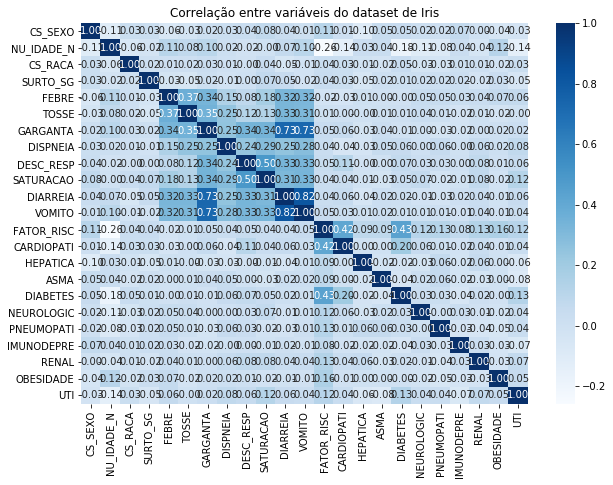

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(covidData.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()